In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

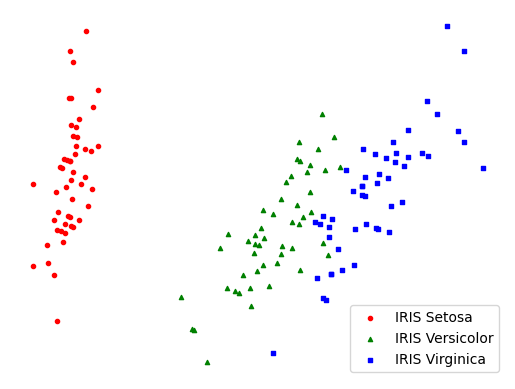

In [5]:
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [6]:
transformed.head()

,0,1
0,-0.344119,0.040948
1,-0.347967,-0.022692
2,-0.370383,-0.018583
3,-0.351967,-0.040808
4,-0.349835,0.041892


In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X_setosa = transformed[Y==0]
X_versicolor = transformed[Y==1]
X_virginica = transformed[Y==2]

In [9]:
X_n = pd.concat([X_setosa, X_versicolor, X_virginica], axis=0)
X_n.shape

(150, 2)

In [10]:
X_train = pd.concat([X_setosa[:40], X_versicolor[:40], X_virginica[:40]], axis=0)
X_train.shape

(120, 2)

In [11]:
y_train = np.concatenate([Y[:40], Y[50:90], Y[100:140]], axis=0)
y_train.shape

(120,)

In [12]:
X_test = pd.concat([X_setosa[40:], X_versicolor[40:], X_virginica[40:]], axis=0)
X_test.shape

(30, 2)

In [13]:
y_test = np.concatenate([Y[40:50], Y[90:100], Y[140:150]], axis=0)
y_test.shape

(30,)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))

cm = confusion_matrix(y_test, y_pred)

1.0
1.0


Text(70.72222222222221, 0.5, 'Y_pred')

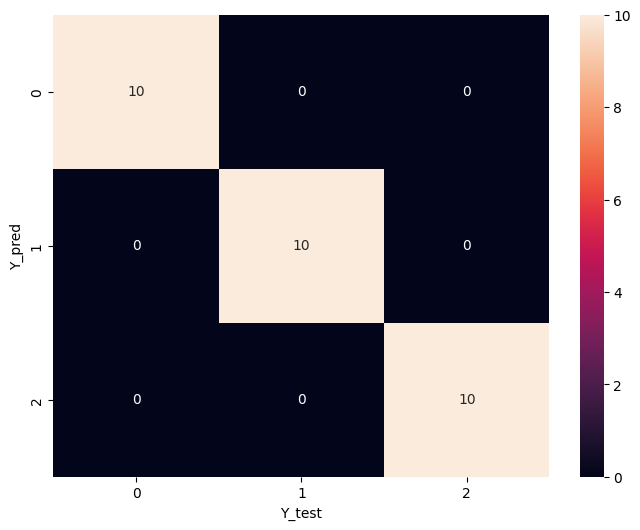

In [17]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')